<a href="https://colab.research.google.com/github/Sakshi-7699/Machine-Learning-Projects/blob/master/DMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Movie Success Predictor** 

In [7]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud





**1.Exploring the Dataset**

In [8]:
# lets explore movies.csv
data= pd.read_csv('/content/movies.csv')
data.shape

(27278, 3)

In [9]:
data.head() #displays first 5 entries 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [11]:
#number of unique movies
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [12]:
#  exploring ratings.CSV
ratings_data=pd.read_csv('/content/ratings.csv',sep=',')
ratings_data.shape

(1048575, 4)

In [13]:
#summary of ratings.csv
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [14]:
#minimum rating given to a movie
ratings_data['rating'].min() 


0.5

In [15]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

**2.Cleaning of data**

In [16]:
# checking movies.csv
data.shape

(27278, 3)

In [17]:
#is any row null
data.isnull().any()


movieId    False
title      False
genres     False
dtype: bool

In [18]:
#checking ratings.csv
ratings_data.shape

(1048575, 4)

In [19]:
#is any row null there
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [21]:
#checking tags.csv
tags_data=pd.read_csv('/content/tags.csv',sep=',')
tags_data.shape


(465564, 4)

In [22]:
#is any row null in tags.csv
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [23]:
# lets drop null rows
tags_data=tags_data.dropna()

In [24]:
# after cleaning the data there are no more null rows in tags.csv
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [25]:
# number of unique tags 
unique_tags=tags_data['tag'].unique().tolist()
len(unique_tags)


38643

In [26]:
unique_tags[:5]

['Mark Waters', 'dark hero', 'noir thriller', 'bollywood', 'screwball comedy']

**3. Data Analysis**

In [27]:
# filtering to get the list of drama movies
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [28]:
#total number of drama movies
drama_movies.shape

(27278,)

In [29]:
#filtering to get the list of comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [30]:
#total no. of comedy movies
comedy_movies.shape

(27278,)

In [31]:
#search movie id by tag search
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
4,65,592,dark hero,1368150078
21,65,6874,dark hero,1368150079
51,121,778,dark comedy,1300852846


In [32]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_data.head() 

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [33]:
del ratings_data['timestamp']

-----sakshi end


In [34]:
#displays first 5 data from a dataframe
#here ratings.csv has 3 columns
ratings_data.head() 

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [35]:
#displays first 5 data from a dataframe
#here movies.csv has 3 columns
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0


In [37]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)


,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [38]:
# displays low rated movies
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [39]:
#slicing out columns to display only title and genres columns from movies.csv
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [40]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [41]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [42]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

**4. Data Visualization**

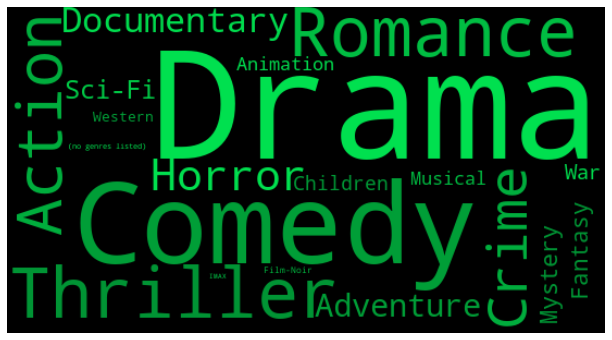

In [43]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

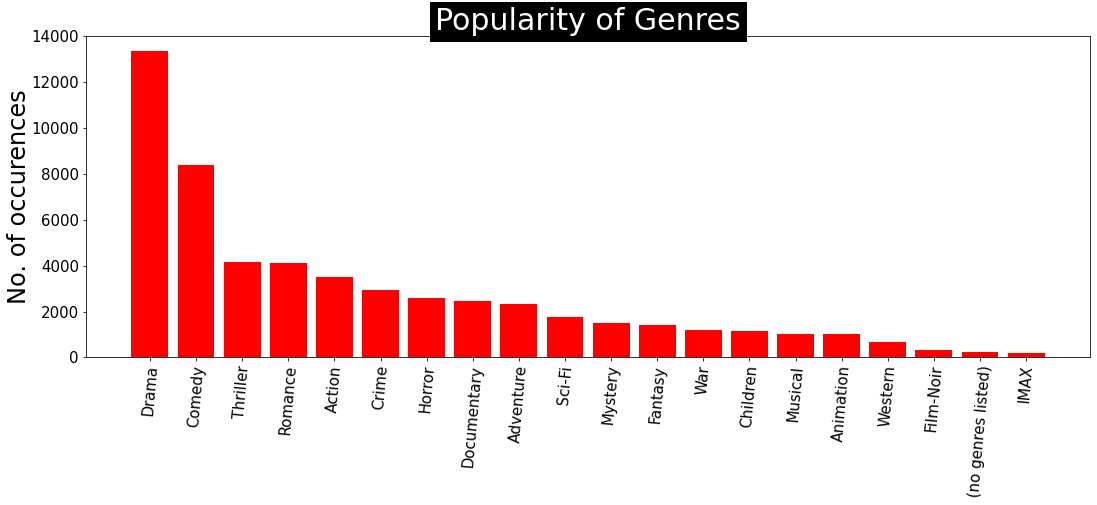

In [44]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [45]:
movie_count=movie_data_ratings_data.groupby('movieId').size()
master_data_edit=movie_count[movie_count==1]
print(master_data_edit)

movieId
127       1
130       1
133       1
139       1
142       1
         ..
130052    1
130073    1
130219    1
130462    1
130642    1
Length: 2558, dtype: int64


In [46]:
for m in master_data_edit.index:
  movie_data_ratings_data=movie_data_ratings_data.drop(movie_data_ratings_data[movie_data_ratings_data.movieId==m].index)
movie_data_ratings_data.shape

(1046017, 5)

In [47]:
movie_data_ratings_data.shape
movie_data_ratings_data['userId'].value_counts().tail(10)
rating_for_one=movie_data_ratings_data.groupby('userId').agg([np.size,np.mean])
rating_for_one.head(10)


movieId              rating          
          size         mean   size      mean
userId                                      
1          175  3428.537143  175.0  3.742857
2           61  2098.524590   61.0  4.000000
3          187  1698.331551  187.0  4.122995
4           28   394.964286   28.0  3.571429
5           66   574.484848   66.0  4.272727
6           24   461.875000   24.0  3.750000
7          276  2425.079710  276.0  3.289855
8           70   339.385714   70.0  3.800000
9           35  3185.742857   35.0  3.057143
10          38  1470.973684   38.0  3.894737

In [48]:
rating_for_one.drop('movieId',axis=1)

rating          
         size      mean
userId                 
1       175.0  3.742857
2        61.0  4.000000
3       187.0  4.122995
4        28.0  3.571429
5        66.0  4.272727
...       ...       ...
7116    232.0  3.797414
7117    188.0  3.936170
7118     40.0  4.075000
7119     50.0  3.740000
7120     20.0  4.125000

[7120 rows x 2 columns]

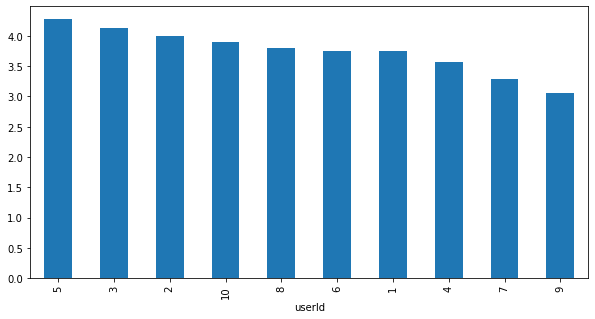

In [49]:
#displays high rated movies
high_rated= rating_for_one['rating']['mean']>4.0
rating_for_one[high_rated].head(10)
rating_for_one['rating']['mean'].head(10).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.show()


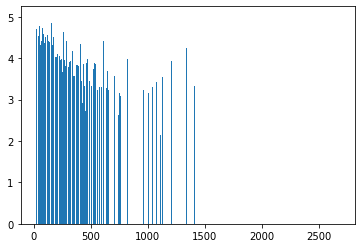

In [50]:
plt.bar(rating_for_one['rating']['size'],rating_for_one['rating']['mean'])
plt.show()